<a href="https://colab.research.google.com/github/inhamjchoi/SafetyDataClass/blob/main/Ex03_1_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
data = pd.read_csv("Ex03_1_Data.csv", header=None)
X_raw = data.iloc[:, :2].values
y = data.iloc[:, 2].values

In [37]:
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [38]:
# Sigmoid function
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

# Add intercept term (bias) to the input features
def add_bias(X):
    m = X.shape[0]  # number of training examples
    return np.hstack([np.ones((m, 1)), X])  # add a column of ones to X as the first column (bias term, X0)

def plot_data(X2, y):
    pos = y == 1
    neg = y == 0
    plt.scatter(X2[pos, 0], X2[pos, 1], marker='+', label='Admitted')
    plt.scatter(X2[neg, 0], X2[neg, 1], edgecolors='k', marker='o', label='Not admitted')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend()

def plot_decision_boundary(theta, X, y):
    plt.figure()
    plot_data(X[:, 1:], y)  # bias 제외
    x1_min, x1_max = X[:, 1].min(), X[:, 1].max()
    x1_vals = np.array([x1_min, x1_max])
    x2_vals = -(theta[0] + theta[1]*x1_vals) / theta[2] # theta0 + theta1*x1 + theta2*x2 = 0  →  x2 = -(theta0 + theta1*x1)/theta2
    plt.plot(x1_vals, x2_vals, label='Decision Boundary')
    plt.title('Decision Boundary')
    plt.show()

def predict(theta, X):
    return (sigmoid(X @ theta) >= 0.5).astype(int)  # convert bool(T or F) to int(1 or 0)

In [39]:
#Featrue scaling
X = X_raw.astype(float)
X_mean = X.mean(axis=0)
X_std  = X.std(axis=0, ddof=0) + 1e-8
X = (X - X_mean) / X_std

In [40]:
Xb = add_bias(X)   # [1, x1, x2]
m, n = Xb.shape
theta = np.zeros(n)  # [0, 0, 0]

alpha = 0.1
epochs = 4000

def cost(theta, Xb, y):
    h = sigmoid(Xb @ theta)
    eps = 1e-12
    h = np.clip(h, eps, 1 - eps)   # avoid log(0)
    return -(y @ np.log(h) + (1 - y) @ np.log(1 - h)) / len(y)

for i in range(epochs):
    h = sigmoid(Xb @ theta)
    grad = (Xb.T @ (h - y)) / m
    theta -= alpha * grad
    if (i+1) % 500 == 0:
         print(i+1, cost(theta, Xb, y))


500 0.22439244481861975
1000 0.2105175841529866
1500 0.20649419161966479
2000 0.2049151444563627
2500 0.20420708837421755
3000 0.20386525547384643
3500 0.20369252378999825
4000 0.20360258389932162


Training accuracy: 89.00%
Prob(Admit | 45, 85): 0.7676


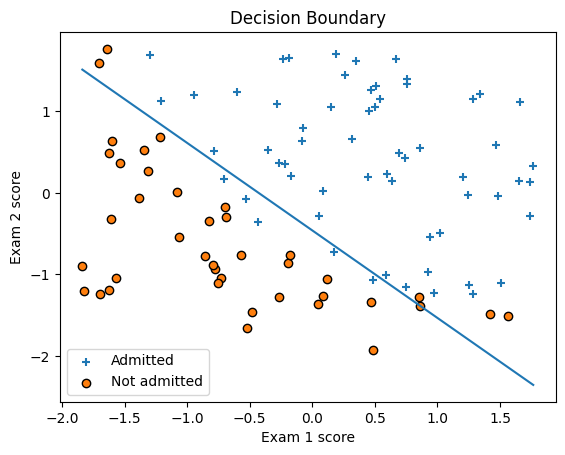

In [41]:
acc = (predict(theta, Xb) == y).mean() * 100  # return 0 or 1 after comparing with y value
print(f"Training accuracy: {acc:.2f}%")

example = np.array([45.0, 85.0])
example_sc = (example - X_mean) / X_std
prob = sigmoid(np.r_[1.0, example_sc] @ theta)
print(f"Prob(Admit | 45, 85): {prob:.4f}")

plot_decision_boundary(theta, Xb, y)